In [1]:
import numerical_integrators.adaptive_step as adaptive_step
print(adaptive_step.__doc__)

This module contains a selection of adaptive timestep integrators
intended for general-purpose use. All integrators have the same
function signature, as in, they take the same input parameters and
return the same output variables in the same order, with the
difference being the underlying integration scheme.

The module contains the following adaptive step size integrators:
   rkbs32: Bogacki-Shampine 3(2)
   rkbs54: Bogacki-Shampine 5(4)
   rkck45: Cash-Karp 4(5)
   rkdp54: Dormand-Prince 5(4)
   rkdp87: Dormand-Prince 8(7)
   rkf12:  Runge-Kutta-Fehlberg 1(2)
   rkf45:  Runge-Kutta-Fehlberg 4(5)
   rkhe21: Heun-Euler 2(1)

where the digit outside of the parenthesis indicates the method order,
and the digit within the parenthesis indicates the order of the
interpolant solution (used in adjusting the time step).

All functions have the same structure:

def scheme(t, x, h, f, atol, rtol):
   [...]
   return _t, _x, _h

where t:    Current time level
      x:    Current coordinates, arra

In [3]:
def deriv(t, x):
    return 1/(1+t**2)

In [4]:
import jallah

In [5]:
import numpy as np

import matplotlib.pyplot as plt

def get_trajectory(f, integrator, t_max, h0, x0, t0, **kwargs):
    Xs = [x0]
    Ts = [t0]
    t = t0
    x = x0
    h = h0
    while t < t_max:
        # Ensure we don't overstep:
        h = np.min([h, t_max - t])
        t_, x_, h = integrator(t, x, h, f, **kwargs)
        # Check if step was accepted
        if t_ > t:
            t = t_
            x = x_
            Xs.append(x)
            Ts.append(t)
    return Ts ,Xs

def get_endpoint(f, integrator, t_max, h0, x0, t0, **kwargs):
    t = t0
    x = x0
    h = h0
    while t < t_max:
        # Ensure we don't overstep:
        h = np.min(h, t_max - t)
        t_, x_, h = integrator(t, x, h, f, **kwargs)
        # Check if step was accepted
        if t_ > t:
            t = t_
            x = x_
    return t, x


In [11]:
t = 0.
x = 0.
h = 0.1

from jallah import single_step

t, x, h = single_step.rk4(t, x, h, deriv)
print(t)
print(x)
print(h)

0.1
0.0996687324593
0.1


100 loops, best of 3: 7.14 ms per loop


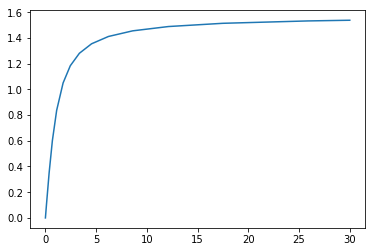

In [9]:
from numerical_integrators import *
integrator = rkbs54
%timeit Ts, Xs = get_trajectory(deriv, integrator, t_max = 30, h0 = 0.1, x0 = 0.0, t0 = 0.0)
%matplotlib inline
plt.figure()
plt.plot(Ts, Xs)

In [6]:
print jallah.__doc__

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-6-22f6910b7337>, line 1)

In [7]:
print(jallah.__doc__)

This module 'jallah' is auto-generated with f2py (version:2).
Functions:
Fortran 90/95 modules:
  f_numerical_integrators --- rkdp54().


In [7]:
print(jallah.f_numerical_integrators.__doc__)

t_,x_,h_ = euler(t,x,h,f,[f_extra_args])

Wrapper for ``euler``.

Parameters
----------
t : input float
x : input float
h : input float
f : call-back function

Other Parameters
----------------
f_extra_args : input tuple, optional
    Default: ()

Returns
-------
t_ : float
x_ : float
h_ : float

Notes
-----
Call-back functions::

  def f(t,x): return k1
  Required arguments:
    t : input float
    x : input float
  Return objects:
    k1 : float



In [10]:
Ts, Xs = get_trajectory(deriv, jallah.f_numerical_integrators.rkdp54, t_max = 30, h0 = 0.1, x0 = 0.0, t0 = 0.0)

KeyboardInterrupt: 

In [5]:
%matplotlib inline

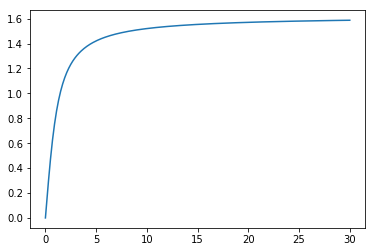

In [6]:
plt.plot(Ts, Xs)

In [11]:
from numerical_integrators import rkdp54

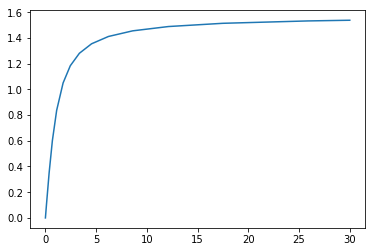

In [12]:
Ts, Xs = get_trajectory(deriv, rkdp54, t_max = 30, h0 = 0.1, x0 = 0.0, t0 = 0.0)
plt.plot(Ts, Xs)

0.011005401611328125


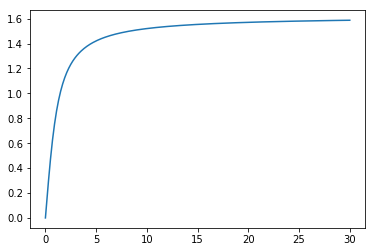

In [11]:
start = time.time()
Ts, Xs = get_trajectory(deriv, jallah.f_numerical_integrators.euler, t_max = 30, h0 = 0.1, x0 = 0.0, t0 = 0.0)
end = time.time()
print(end-start)
plt.plot(Ts, Xs)

In [11]:
import numerical_integrators

In [9]:
import time

In [10]:
start = time.time()
Ts, Xs = get_trajectory(deriv, numerical_integrators.euler, t_max = 30, h0 = 0.1, x0 = 0.0, t0 = 0.0)
end = time.time()
print(end-start)

0.008268356323242188


In [40]:
start = time.clock()
% timeit Ts, Xs = get_trajectory(deriv, single_step.rk2, t_max = 30, h0 = 0.1, x0 = 0.0, t0 = 0.0)
end = time.clock()
print(end-start)
err = sum(abs(Xs - np.arctan(Ts)))
print(err)

10 loops, best of 3: 33.1 ms per loop
0.6399110000000015
1.03616926975e-06


In [41]:
start = time.clock()
% timeit Ts, Xs = get_trajectory(deriv, numerical_integrators.rk2, t_max = 30, h0 = 0.1, x0 = 0.0, t0 = 0.0)
end = time.clock()
print(end-start)
err = sum(abs(Xs - np.arctan(Ts)))
print(err)

10 loops, best of 3: 29.4 ms per loop
0.6464619999999996
1.03616926975e-06


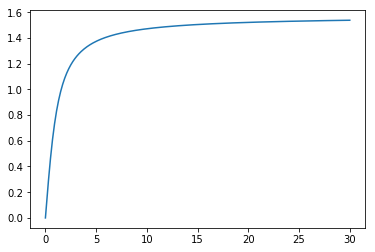

In [10]:
%matplotlib inline
plt.figure()
plt.plot(Ts, Xs)

In [ ]:
U